In [1]:
import pandas as pd

df = pd.read_csv("customer_churn_data.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

,0
customer_id,0
age,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


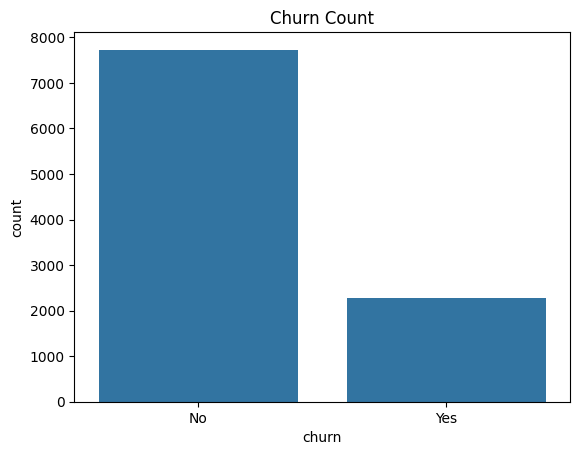

Churn Rate:
churn
No     0.7728
Yes    0.2272
Name: proportion, dtype: float64


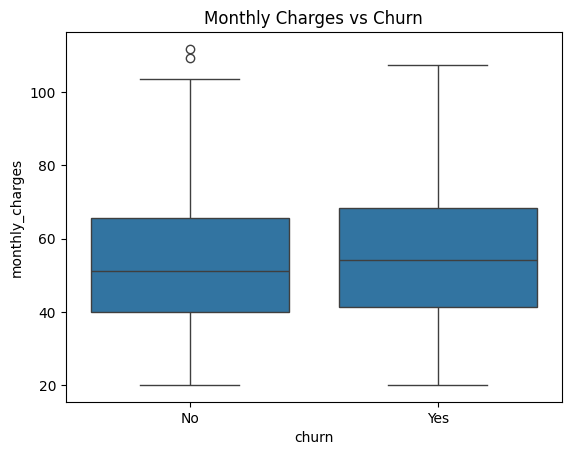

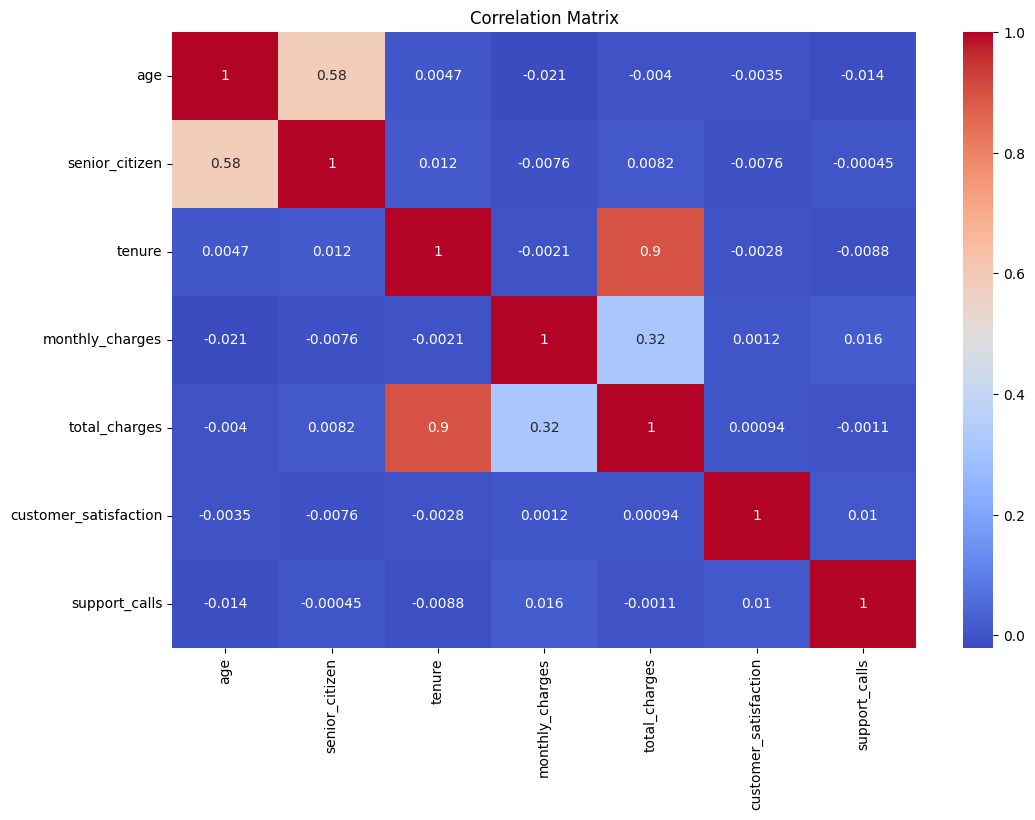

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Count")
plt.show() # Added plt.show() to display the plot

# Churn rate
churn_rate = df['churn'].value_counts(normalize=True)
print("Churn Rate:") # Added a title for the churn rate
print(churn_rate)

# Monthly charges vs Churn
plt.figure() # Added a new figure for the boxplot
sns.boxplot(x='churn', y='monthly_charges', data=df) # Corrected column name and y-axis label
plt.title("Monthly Charges vs Churn") # Added a title for the boxplot
plt.show() # Added plt.show() to display the plot

# Correlation matrix
plt.figure(figsize=(12, 8)) # Added a new figure and adjusted size for the heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') # Added cmap for better visualization
plt.title("Correlation Matrix") # Added a title for the heatmap
plt.show() # Added plt.show() to display the plot

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'churn':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
df_encoded['churn'] = df_encoded['churn'].map({'Yes':1, 'No':0})

# Scale numerical features
scaler = StandardScaler()
df_encoded[['tenure', 'monthly_charges', 'total_charges']] = scaler.fit_transform(df_encoded[['tenure', 'monthly_charges', 'total_charges']])

# Feature and label split
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(df_encoded.head())

,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,0,52,1,0,1,1,-0.762279,1,0,1,...,2,0,1,1,2,-0.848264,-0.751726,4,3,0
1,1,42,1,0,1,0,0.490085,1,0,2,...,1,1,1,1,2,-0.779043,0.079239,3,1,0
2,2,54,1,0,0,1,-0.511806,1,2,1,...,2,2,0,0,0,1.826135,-0.205257,2,3,1
3,3,67,1,1,0,0,-0.962658,1,0,0,...,0,0,1,0,1,0.029319,-0.853828,4,5,0
4,4,41,0,0,1,0,-0.762279,1,0,1,...,0,0,0,1,2,1.063530,-0.607393,3,3,0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
SVM model trained.



Logistic Regression Evaluation:
Accuracy: 0.7825
Precision: 0.5974025974025974
Recall: 0.1978494623655914
F1 Score: 0.2972536348949919


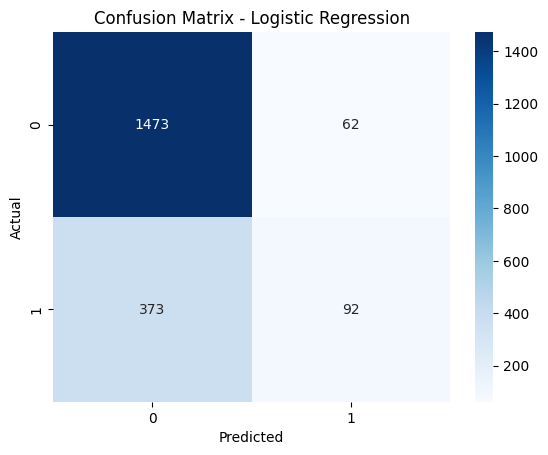


Decision Tree Evaluation:
Accuracy: 0.682
Precision: 0.32727272727272727
Recall: 0.34838709677419355
F1 Score: 0.3375


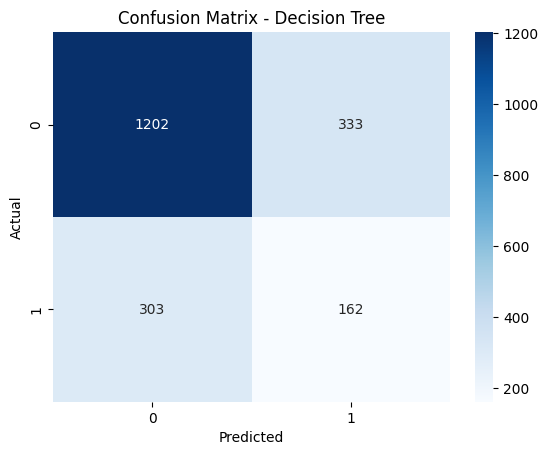


Random Forest Evaluation:
Accuracy: 0.7795
Precision: 0.5740740740740741
Recall: 0.2
F1 Score: 0.2966507177033493


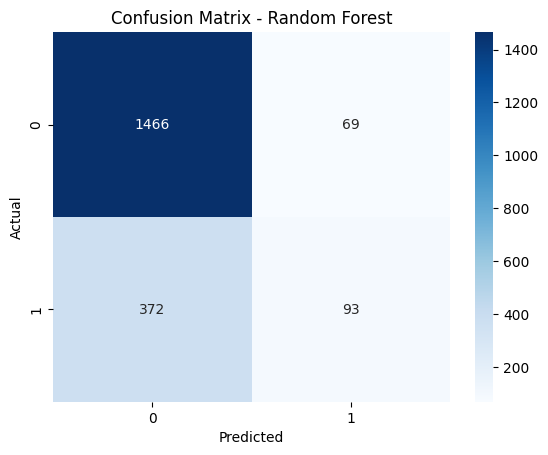


SVM Evaluation:
Accuracy: 0.7675
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


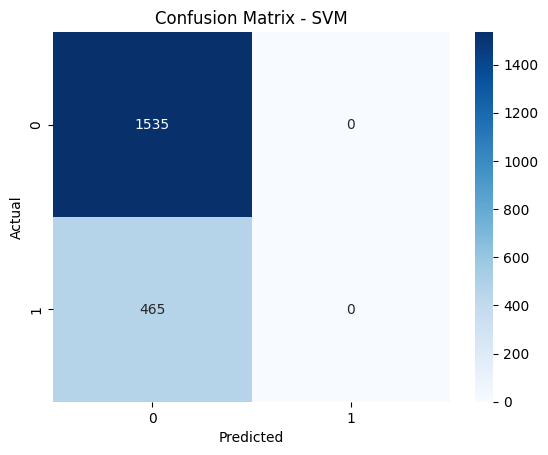

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()